In [28]:
import pandas as pd 
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv("dataCOMP0050Coursework1.csv")

## Data Augmentation

We need to first clean the data.

1. Look at the number of unique values and remove columns that only contain one unique value. 
2. Remove columns that have a low variance 

In [49]:
print(df.nunique())

NameError: name 'unidecode' is not defined

In [52]:
from datetime import datetime
my_dates = ['14-Dec', '12-Jan', '09-Feb', '13-Jun']
dates = list(dates)

def datechanger(x):
    try:
        return datetime.strptime(x,"%y-%b")
    except:
        x = "0" + x
        return datetime.strptime(x, "%y-%b")
    
dates.sort(key=datechanger)

['8-Jan', '8-Jan', '8-Mar', '8-Jun', '8-Oct', '8-Oct', '8-Nov', '9-Mar', '9-Apr', '9-Apr', '9-Apr', '9-Apr', '9-May', '9-May', '9-Jun', '9-Jun', '9-Jul', '9-Aug', '9-Aug', '9-Sep', '9-Sep', '9-Oct', '9-Nov', '9-Dec', '9-Dec', '10-Jan', '10-Jan', '10-Jan', '10-Mar', '10-Mar', '10-May', '10-May', '10-Jun', '10-Jun', '10-Jul', '10-Jul', '10-Aug', '10-Aug', '10-Aug', '10-Aug', '10-Aug', '10-Aug', '10-Sep', '10-Sep', '10-Sep', '10-Sep', '10-Oct', '10-Oct', '10-Oct', '10-Oct', '10-Oct', '10-Oct', '10-Nov', '10-Nov', '10-Nov', '10-Dec', '10-Dec', '10-Dec', '10-Dec', '10-Dec', '10-Dec', '11-Jan', '11-Jan', '11-Jan', '11-Jan', '11-Jan', '11-Feb', '11-Feb', '11-Feb', '11-Feb', '11-Feb', '11-Feb', '11-Feb', '11-Feb', '11-Feb', '11-Feb', '11-Mar', '11-Mar', '11-Mar', '11-Mar', '11-Mar', '11-Mar', '11-Mar', '11-Mar', '11-Mar', '11-Apr', '11-Apr', '11-Apr', '11-Apr', '11-Apr', '11-Apr', '11-Apr', '11-May', '11-May', '11-May', '11-May', '11-May', '11-May', '11-May', '11-May', '11-May', '11-May', '11-

In [850]:
import pandas
from collections import Counter
%matplotlib qt
dates = list(df[df['charged_off'] == 1]['issue_d'])
dates.sort(key=datechanger)
counts = Counter(dates)
counts_df = pandas.DataFrame.from_dict(counts, orient='index')


counts_df.plot(kind='bar')

<AxesSubplot:>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


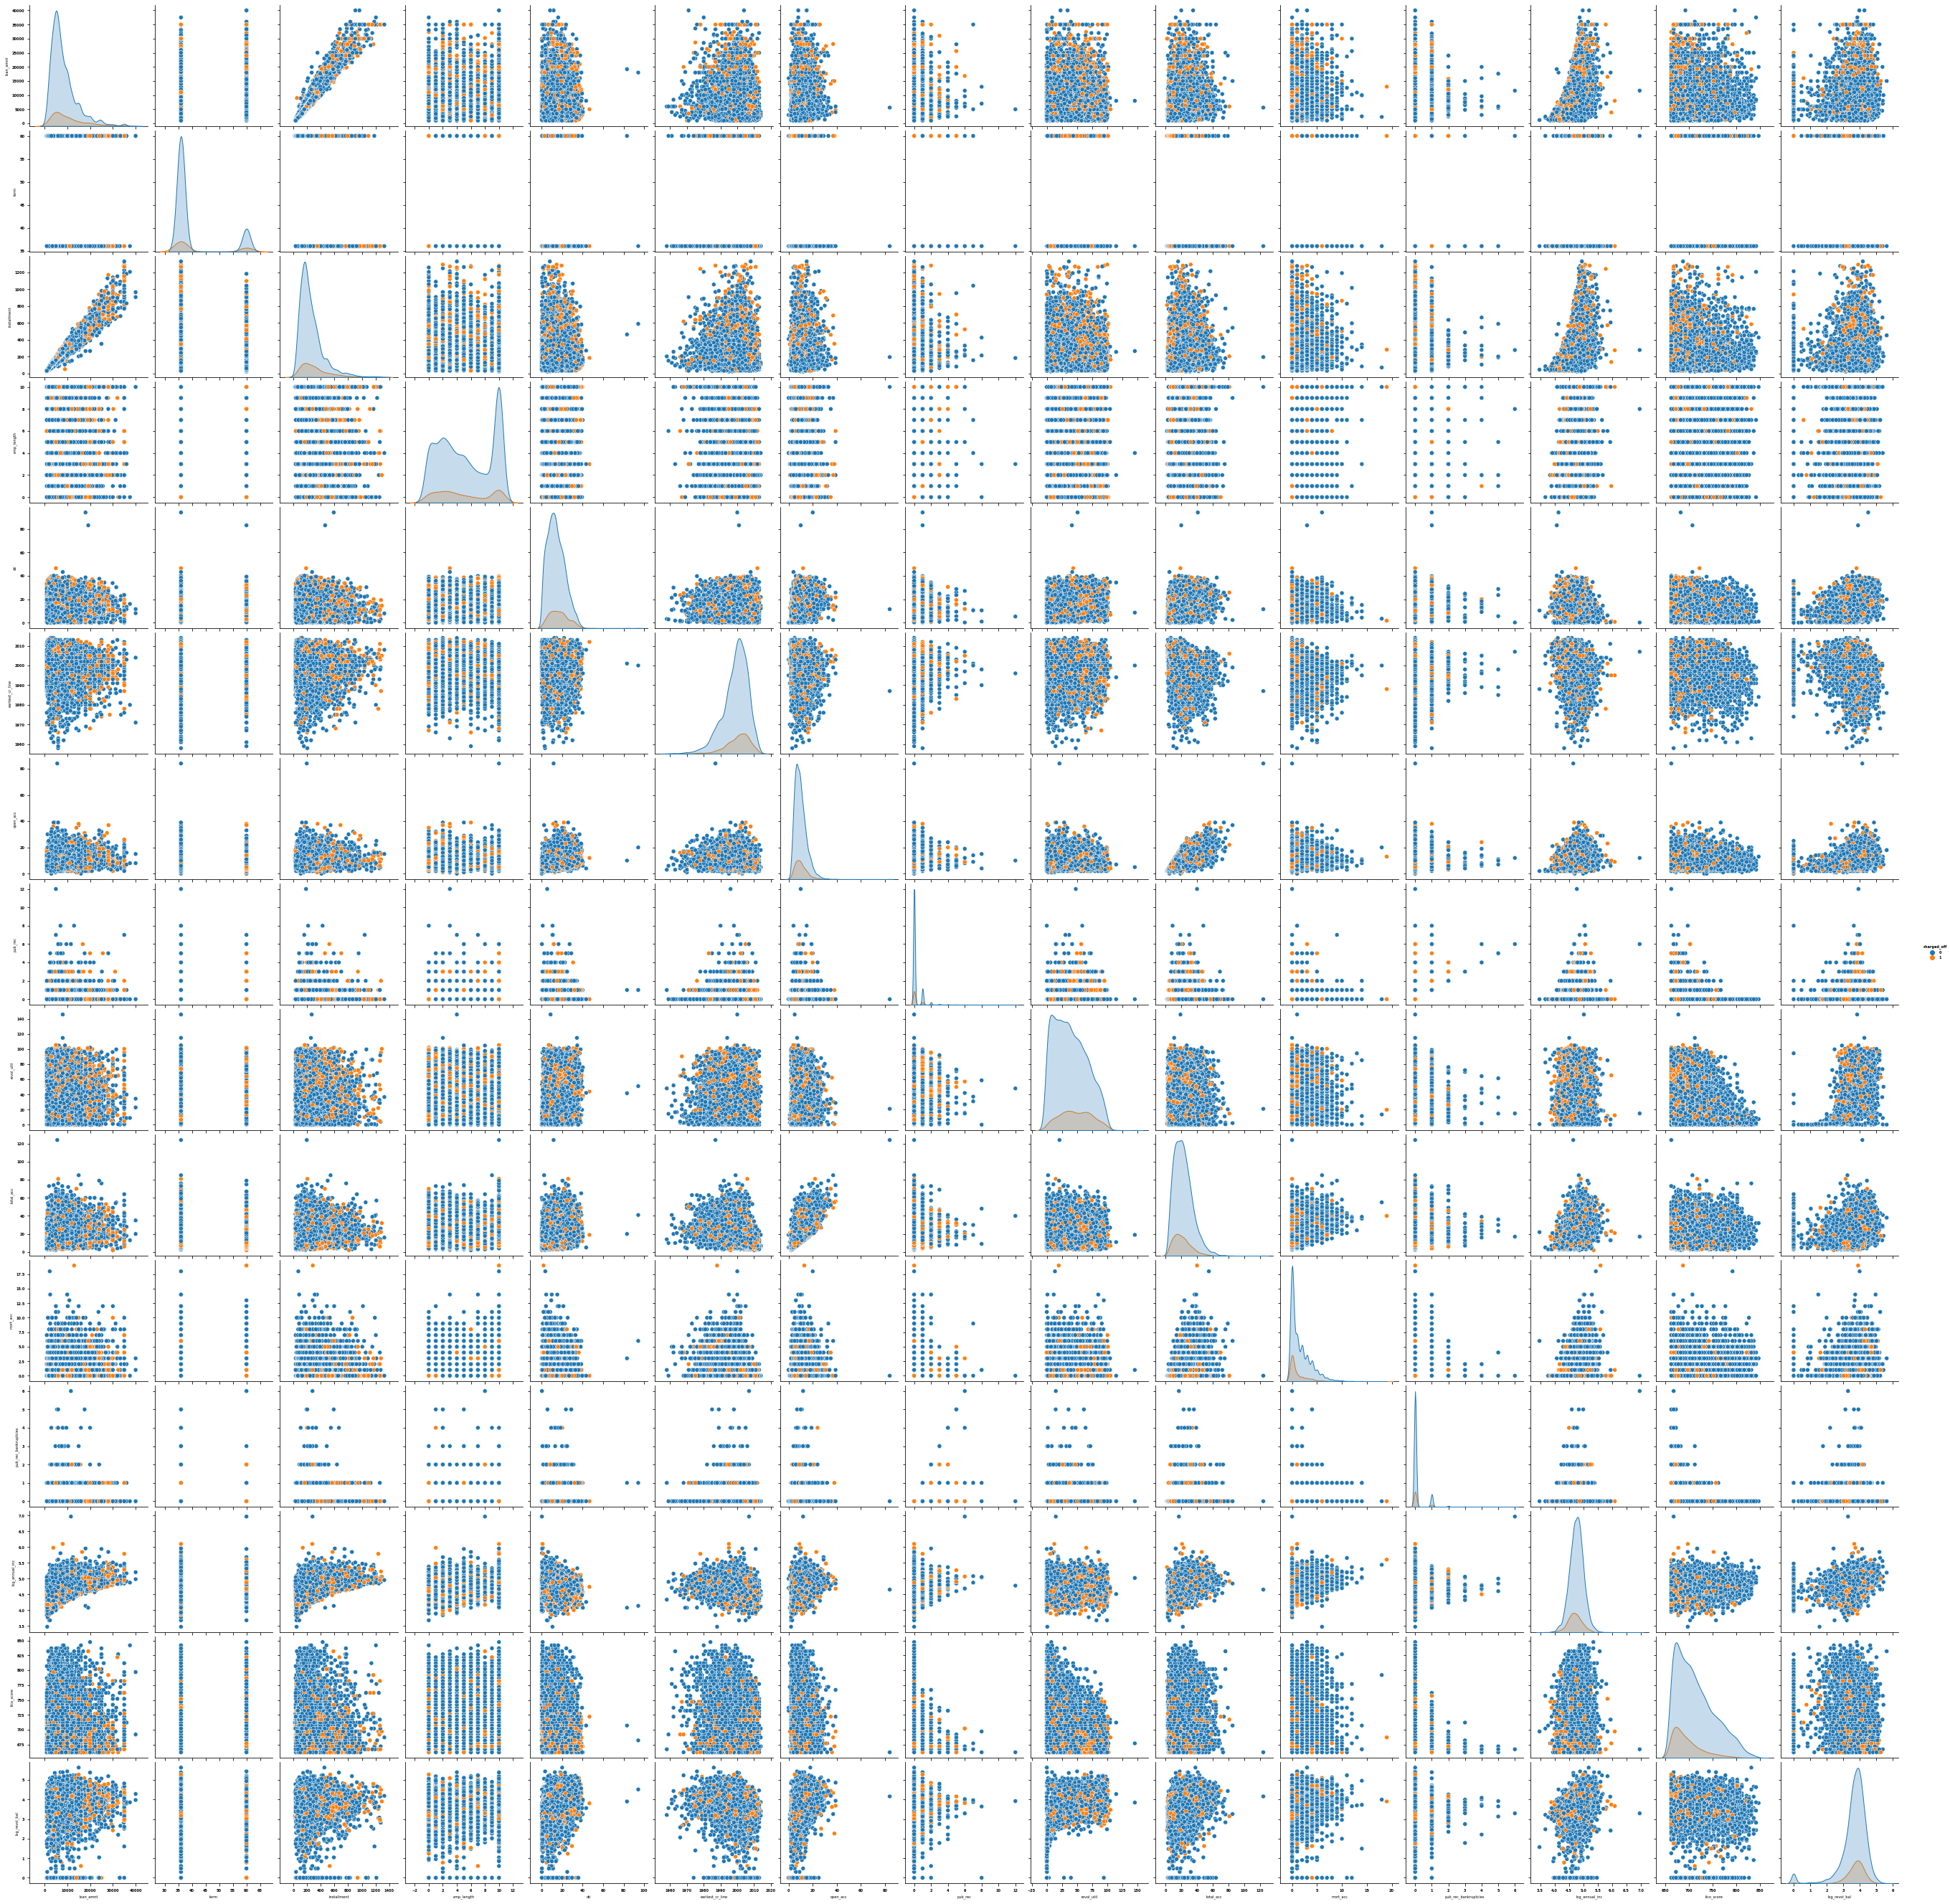

In [37]:
sns.pairplot(df, hue='charged_off')

### Checking variance of numerical columns

In [773]:
num_cols = df.select_dtypes(include=np.number)
pd.DataFrame(num_cols)

loan_amnt  term  installment  emp_length    dti  earliest_cr_line  \
0          5675    36       189.56         2.0  15.55              1992   
1          7000    36       242.63         1.0   6.78              2002   
2          3500    36       116.24        10.0  10.65              1997   
3         10000    36       316.47        10.0  21.74              1996   
4          1500    36        46.31         2.0  12.17              1997   
...         ...   ...          ...         ...    ...               ...   
8924       1000    36        31.30         8.0  10.82              1992   
8925      10000    60       216.33        10.0  15.58              2002   
8926      25000    36       864.80         5.0   3.83              2002   
8927      16000    36       546.77        10.0  26.20              1988   
8928      20000    60       513.22        10.0  10.32              2005   

      open_acc  pub_rec  revol_util  total_acc  mort_acc  \
0            7        0        15.0         15       0.0   
1            3        0        69.2          5       0.0   
2           16        0        12.6         35       2.0   
3            7        0        23.7         22       4.0   
4            8        0        46.5         13       2.0   
...        ...      ...         ...        ...       ...   
8924         6        0        40.0         26       1.0   
8925        11        0        30.9         33       3.0   
8926        10        0        57.7         17       0.0   
8927        26        0        62.0         43       4.0   
8928         5        0        30.4         10       0.0   

      pub_rec_bankruptcies  log_annual_inc  fico_score  log_revol_bal  \
0                      0.0        4.698979       697.0       3.464936   
1                      0.0        4.301052       717.0       3.431364   
2                      0.0        4.681250       742.0       3.765520   
3                      0.0        4.875067       707.0       3.424555   
4                      0.0        4.812920       712.0       4.448211   
...                    ...             ...         ...            ...   
8924                   0.0        4.929424       762.0       3.602277   
8925                   0.0        5.025310       707.0       4.189462   
8926                   0.0        4.944488       677.0       3.897902   
8927                   0.0        5.243041       682.0       5.076957   
8928                   0.0        4.875067       677.0       3.026942   

      charged_off  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
8924            0  
8925            0  
8926            0  
8927            0  
8928            1  

[8929 rows x 16 columns]

Here we are removing columns with zero variance first

In [777]:
# split data into inputs and outputs
data = pd.DataFrame(num_cols).values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    print(transform.get_support(indices=True))
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.ylabel("Number of Features")
plt.xlabel("Variance")
plt.title("Number of features with variance less than threshold")
plt.show()

(8929, 15) (8929,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
>Threshold=0.00, Features=15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
>Threshold=0.05, Features=15
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
>Threshold=0.10, Features=14
[ 0  1  2  3  4  5  6  7  8  9 10 13 14]
>Threshold=0.15, Features=13
[ 0  1  2  3  4  5  6  7  8  9 10 13 14]
>Threshold=0.20, Features=13
[ 0  1  2  3  4  5  6  7  8  9 10 13 14]
>Threshold=0.25, Features=13
[ 0  1  2  3  4  5  6  7  8  9 10 13 14]
>Threshold=0.30, Features=13
[ 0  1  2  3  4  5  6  8  9 10 13 14]
>Threshold=0.35, Features=12
[ 0  1  2  3  4  5  6  8  9 10 13 14]
>Threshold=0.40, Features=12
[ 0  1  2  3  4  5  6  8  9 10 13 14]
>Threshold=0.45, Features=12
[ 0  1  2  3  4  5  6  8  9 10 13 14]
>Threshold=0.50, Features=12


Here we are trying to get rid of columns that have variance lower than a certain threshold.  

In [778]:
 def variance_threshold_selector(data, t=0.5):
    data = pd.DataFrame(data).values
    X = data[:, :-1]
    y = data[:, -1]
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    X = pd.DataFrame(X)
    return transform.get_support(indices=True)

In [779]:
sel_cols = variance_threshold_selector(num_cols, 0.2)

In [780]:
#Split into numerical features and label 
X = num_cols.iloc[:, :-1]
y = num_cols.iloc[:, -1]

X = X.iloc[:, sel_cols]

Below our threshold of 0.2, we find that we can ignore the log_annual_inc and pub_rec_bankrupties features.  

In [781]:
np.std(num_cols['log_annual_inc'])**2

0.0610838656616725

In [782]:
np.std(num_cols['pub_rec_bankruptcies'])**2

0.1479714177160926

In [783]:
df.isnull().sum()

loan_amnt                  0
term                       0
installment                0
emp_length               425
home_ownership             0
verification_status        0
issue_d                    0
purpose                    0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_util                14
total_acc                  0
application_type           0
mort_acc                1756
pub_rec_bankruptcies      17
log_annual_inc             0
fico_score                 0
log_revol_bal              0
charged_off                0
dtype: int64

In [784]:
#Checking for duplicates

df.duplicated().sum()

0

In [785]:
X.isnull().sum()

loan_amnt              0
term                   0
installment            0
emp_length           425
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_util            14
total_acc              0
mort_acc            1756
fico_score             0
log_revol_bal          0
dtype: int64

In [786]:
X['emp_length'].fillna(10,inplace=True)
X['mort_acc'].fillna(0, inplace=True)
X['revol_util'].fillna(X['revol_util'].median(), inplace=True)

In [787]:
X.isnull().sum()

loan_amnt           0
term                0
installment         0
emp_length          0
dti                 0
earliest_cr_line    0
open_acc            0
pub_rec             0
revol_util          0
total_acc           0
mort_acc            0
fico_score          0
log_revol_bal       0
dtype: int64

In [788]:
plt.rcParams.update(plt.rcParamsDefault)

In [789]:
X.hist()
plt.yscale('log')
plt.tight_layout()

In [790]:
names = X.columns
correlations = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90)
ax.set_yticklabels(names)
plt.show()

In [794]:
X = X.drop('loan_amnt', axis = 1)

KeyError: "['loan_amnt'] not found in axis"

In [795]:
X

term  installment  emp_length    dti  earliest_cr_line  open_acc  \
0       36       189.56         2.0  15.55              1992         7   
1       36       242.63         1.0   6.78              2002         3   
2       36       116.24        10.0  10.65              1997        16   
3       36       316.47        10.0  21.74              1996         7   
4       36        46.31         2.0  12.17              1997         8   
...    ...          ...         ...    ...               ...       ...   
8924    36        31.30         8.0  10.82              1992         6   
8925    60       216.33        10.0  15.58              2002        11   
8926    36       864.80         5.0   3.83              2002        10   
8927    36       546.77        10.0  26.20              1988        26   
8928    60       513.22        10.0  10.32              2005         5   

      pub_rec  revol_util  total_acc  mort_acc  fico_score  log_revol_bal  
0           0        15.0         15       0.0       697.0       3.464936  
1           0        69.2          5       0.0       717.0       3.431364  
2           0        12.6         35       2.0       742.0       3.765520  
3           0        23.7         22       4.0       707.0       3.424555  
4           0        46.5         13       2.0       712.0       4.448211  
...       ...         ...        ...       ...         ...            ...  
8924        0        40.0         26       1.0       762.0       3.602277  
8925        0        30.9         33       3.0       707.0       4.189462  
8926        0        57.7         17       0.0       677.0       3.897902  
8927        0        62.0         43       4.0       682.0       5.076957  
8928        0        30.4         10       0.0       677.0       3.026942  

[8929 rows x 12 columns]

### We now need to standardise our data 

This makes gradient descent much more efficient. 

In [75]:
scaler = StandardScaler()
X_scaled = X
X_scaled[X.columns] = scaler.fit_transform(X[X.columns])

In [76]:
X = X_scaled

### Time to build our decision tree algorithm

In [816]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [817]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [824]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=15)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Predict the response for test dataset
y_train_pred = clf.predict(X_train)

In [825]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
clf.get_params()

Accuracy: 0.7737961926091825
Accuracy: 0.9591208175836483


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [835]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.01458
Feature: 1, Score: 0.14892
Feature: 2, Score: 0.04379
Feature: 3, Score: 0.13341
Feature: 4, Score: 0.08317
Feature: 5, Score: 0.08046
Feature: 6, Score: 0.02949
Feature: 7, Score: 0.13829
Feature: 8, Score: 0.11435
Feature: 9, Score: 0.03415
Feature: 10, Score: 0.09096
Feature: 11, Score: 0.08843


In [839]:
X

term  installment  emp_length    dti  earliest_cr_line  open_acc  \
0       36       189.56         2.0  15.55              1992         7   
1       36       242.63         1.0   6.78              2002         3   
2       36       116.24        10.0  10.65              1997        16   
3       36       316.47        10.0  21.74              1996         7   
4       36        46.31         2.0  12.17              1997         8   
...    ...          ...         ...    ...               ...       ...   
8924    36        31.30         8.0  10.82              1992         6   
8925    60       216.33        10.0  15.58              2002        11   
8926    36       864.80         5.0   3.83              2002        10   
8927    36       546.77        10.0  26.20              1988        26   
8928    60       513.22        10.0  10.32              2005         5   

      pub_rec  revol_util  total_acc  mort_acc  fico_score  log_revol_bal  
0           0        15.0         15       0.0       697.0       3.464936  
1           0        69.2          5       0.0       717.0       3.431364  
2           0        12.6         35       2.0       742.0       3.765520  
3           0        23.7         22       4.0       707.0       3.424555  
4           0        46.5         13       2.0       712.0       4.448211  
...       ...         ...        ...       ...         ...            ...  
8924        0        40.0         26       1.0       762.0       3.602277  
8925        0        30.9         33       3.0       707.0       4.189462  
8926        0        57.7         17       0.0       677.0       3.897902  
8927        0        62.0         43       4.0       682.0       5.076957  
8928        0        30.4         10       0.0       677.0       3.026942  

[8929 rows x 12 columns]

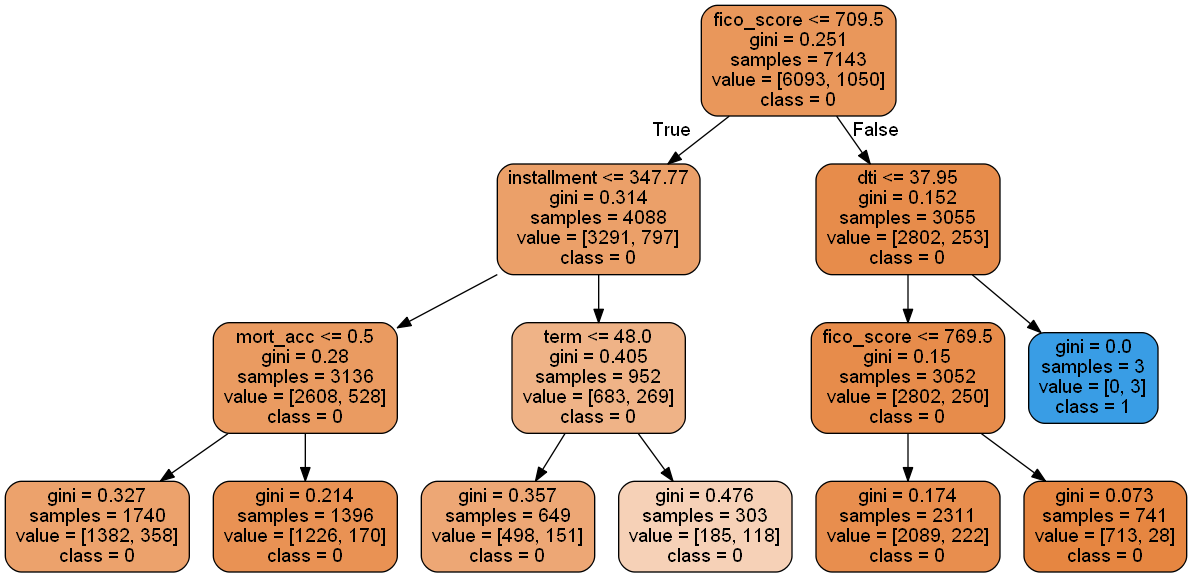

In [821]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [845]:
from sklearn.model_selection import cross_val_score
%matplotlib qt
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='recall'):
    cv_scores_list = []
    cv_scores_std= []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores= cross_val_score(tree_model, X, y, cv=cv, scoring='f1')
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation recall score', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,35)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)


# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Recall score per decision tree depth on training data')



In [828]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn: " +str(tn))
print("fp: " + str(fp))
print("fn: " + str(fn))
print("tp: " + str(tp))
print(tp/(tp+fn))

tn: 1338
fp: 177
fn: 227
tp: 44
0.16236162361623616


In [826]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1515
           1       0.20      0.16      0.18       271

    accuracy                           0.77      1786
   macro avg       0.53      0.52      0.52      1786
weighted avg       0.76      0.77      0.76      1786



In [86]:
len(y_test)

1786

In [829]:
sum(y_test == 1)/len(y_test)

0.1517357222844345

##  Neural Networks

In [663]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets as datasets
from torch.backends import cudnn

In [664]:
X_train_y = pd.concat([X_train, y_train], axis = 1)
X_test_y = pd.concat([X_test, y_test], axis = 1)

X_train_y = X_train_y.apply(pd.to_numeric)
X_test_y = X_test_y.apply(pd.to_numeric)



In [665]:
class LoanDataset():

    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        data = self.dataset.iloc[idx, :]
        data = np.array(data)
        return data[:-1], data[-1]

        if self.transform:
            sample = self.transform(sample)
            return sample

In [811]:
# Create Fully Connected Network
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 6)
        self.fc2 = nn.Linear(6, num_classes)
        
    def forward(self, x):
        x = nn.Dropout(p=0.3)(x)
        x = torch.tanh(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

In [840]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Hyperparameters
input_size = 13
num_classes = 2

#Initialize network
model = NN(input_size=input_size, num_classes=num_classes).to(device)

torch.save(model, 'tensor.pt')

cpu


C:\Users\yamin\miniconda3\envs\msc\lib\site-packages\torch\serialization.py:359: UserWarning: Couldn't retrieve source code for container of type NN. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "


In [841]:
model = torch.load('tensor.pt')
learning_rate = 0.01
batch_size = 64
num_epochs = 5
# Loss and optimizer
criterion = nn.CrossEntropyLoss()

In [842]:
learning_rates = [0.1,0.01,0.001,0.0001]
batch_sizes = [8, 16, 24, 32, 40, 48, 56, 64]
epoch_recall = []
for lr in learning_rates:
    for i in range(num_epochs):
        train_loader = DataLoader(LoanDataset(X_train_y), batch_size = 64, shuffle=True)
        optimizer = optim.Adam(model.parameters(), lr = lr)
        epoch_loss = 0
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for batch_idx, (data, targets) in enumerate(train_loader):
            # Get data to cuda if possible
            data = data.to(device=device)
            targets = targets.to(device=device)
            # forward
            scores = model(data.type('torch.FloatTensor'))
            loss = criterion(scores, targets.type('torch.LongTensor'))

            _, pred = scores.max(1)
            a,b,c,d = score_calc(pred, targets)
            tp += a
            fp += b
            tn += c
            fn += d

            # backward
            optimizer.zero_grad()
            loss.backward()

            # gradient descent or adam step
            optimizer.step

        recall = tp/(tp+fn)
        print(recall)
        epoch_recall.append(recall)

0.24554826616682288
0.23617619493908154
0.2436738519212746
0.2352389878163074
0.24273664479850046
0.22774133083411435
0.23711340206185566
0.2436738519212746
0.24742268041237114
0.2521087160262418
0.246485473289597
0.23336457357075913
0.2530459231490159
0.2549203373945642
0.2661668228678538
0.24554826616682288
0.2408622305529522
0.2380506091846298
0.22399250234301782
0.23992502343017807


In [607]:
epoch_recall

[0.17432052483598875]

In [303]:
def score_calc(pred, actual):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(pred)):
        if actual[i] == 0:
            if pred[i] == 0:
                tn += 1
            else:
                fp += 1
        else:
            if pred[i] == 0:
                fn += 1
            else:
                tp += 1
    return tp, fp, tn, fn

In [799]:
def check_accuracy(loader, model):
    
    all_preds = []
    all_targets = []
        
    num_correct = 0
    num_samples = 0
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    model.eval()
    
    with torch.no_grad():
        for x,y in loader:
            x = x.type('torch.FloatTensor').to(device=device)
            y = y.type('torch.LongTensor').to(device=device)
            scores = model(x)
            _, predictions = scores.max(1)
            
           #Calculating tp,fp,tn,fn for each batch
            
            a, b, c, d = score_calc(predictions, y)
            tp += a
            fp += b
            tn += c
            fn += d
            
            all_preds.append(predictions.numpy())
            all_targets.append(y.numpy())

            
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')
    
    model.train()
    return tp,fp,tn,fn, all_preds, all_targets

In [843]:
tp, fp, tn, fn, all_scores, all_targets = check_accuracy(test_loader, model)
print(classification_report(np.concatenate(all_targets).ravel().tolist(), np.concatenate(all_scores).ravel().tolist()))
#check_accuracy(test_loader, model)

Got 1049 / 1786 with accuracy 58.73
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      1532
           1       0.09      0.21      0.13       254

    accuracy                           0.59      1786
   macro avg       0.46      0.43      0.43      1786
weighted avg       0.73      0.59      0.64      1786



In [768]:
len(all_scores)

112

In [202]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model.eval()

with torch.no_grad: